In [1]:
from google.colab.patches import cv2_imshow
from scipy.spatial.distance import hamming
import urllib.request
import cv2 

In [2]:
def fast_plus_brief(img_gray):
  fast = cv2.FastFeatureDetector_create() 
  brief = cv2.xfeatures2d.BriefDescriptorExtractor_create(use_orientation = True)

  keypoints = fast.detect(img_gray, None)
  keypoints, descriptor = brief.compute(img_gray, keypoints)

  return keypoints,descriptor

In [3]:
def bf_Matcher(train_descriptor, test_descriptor):
  bf = cv2.BFMatcher(cv2.NORM_HAMMING)
  matches = bf.match(train_descriptor, test_descriptor)
  return sorted(matches, key = lambda x : x.distance)

In [4]:
def custom_matcher(descs1, descs2):
  matches = []
  for i, k1 in enumerate(descs1):
    for j, k2 in enumerate(descs2):
      matches.append(cv2.DMatch(_distance=hamming(k1,k2), _imgIdx=0, _queryIdx=i,_trainIdx=j))
  return sorted(matches, key = lambda x : x.distance)

In [10]:
def process_all(img, test_image, best_n):
  train_keypoints, train_descriptor = fast_plus_brief(img)
  test_keypoints, test_descriptor = fast_plus_brief(test_image)


  matches_1 = bf_Matcher(train_descriptor,test_descriptor)
  result_1 = cv2.drawMatches(img, train_keypoints, test_image, test_keypoints, matches_1[:best_n], None, flags = 2)
  cv2_imshow(result_1)

  matches_2 = custom_matcher(train_descriptor, test_descriptor)
  result_2 = cv2.drawMatches(img, train_keypoints, test_image, test_keypoints, matches_2[:best_n], None,
                        flags=2)
  cv2_imshow(result_2)

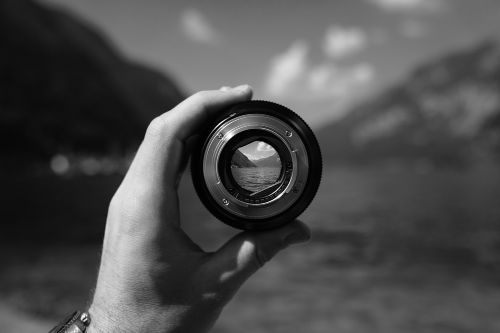

In [6]:

img = cv2.imread("./1.jpg",cv2.IMREAD_GRAYSCALE)

img = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2))
cv2_imshow(img)

In [7]:
test_image = cv2.pyrDown(img)

num_rows, num_cols = test_image.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((num_cols, num_rows), 10, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

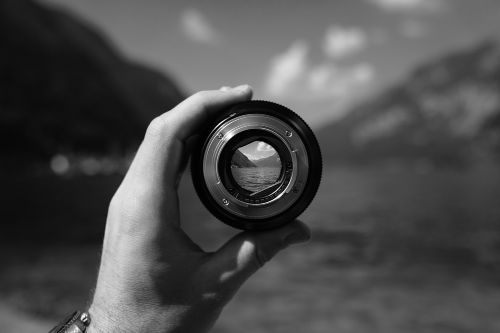

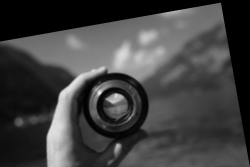

In [11]:
cv2_imshow(img)
cv2_imshow(test_image)

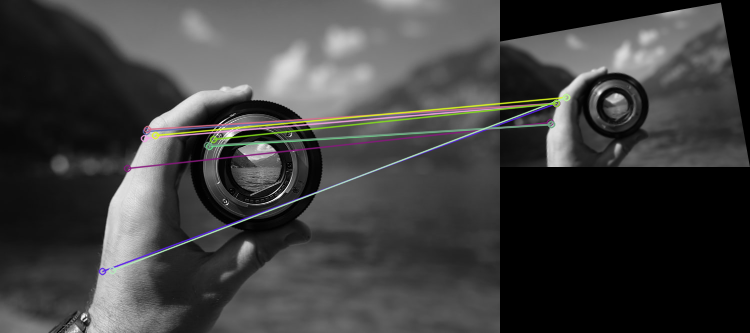

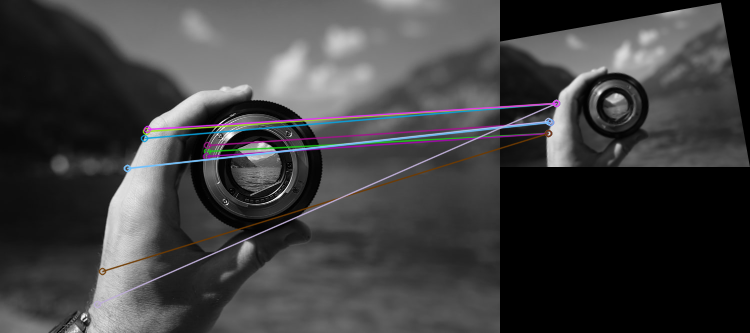

In [12]:
process_all(img,test_image,10)